# Static maps

### Download data

Before we start you need to download (and then extract) the dataset zip-package used during this lesson [from this link](https://github.com/Automating-GIS-processes/Lesson-5-Making-Maps/raw/master/data/dataE5.zip).

You should have following Shapefiles in the `dataE5` folder:

  - addresses.shp
  - metro.shp
  - roads.shp
  - some.geojson
  - TravelTimes_to_5975375_RailwayStation.shp
  - Vaestotietoruudukko_2015.shp

Extract the files into a folder called `data`:

```
    $ cd /home/jovyan/notebooks/L5
    $ wget https://github.com/Automating-GIS-processes/Lesson-5-Making-Maps/raw/master/data/dataE5.zip
    $ unzip dataE5.zip -d data
```

## Static maps in Geopandas

We have already seen during the previous lessons quite many examples how to create static maps using Geopandas.

Thus, we won't spend too much time repeating making such maps but let's create a one with more layers on it than just one which kind we have mostly done this far.

- Let's create a static accessibility map with roads and metro line on it.


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

# Filepaths
grid_fp = "data/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = "data/roads.shp"
metro_fp = "data/metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

Next, we need to be sure that the files are in the same coordinate system. 

- Let's use the crs of our travel time grid as basis:

In [3]:
# Get the CRS of the grid
CRS = grid.crs

# Reproject geometries using the crs of travel time grid
roads['geometry'] = roads['geometry'].to_crs(crs=CRS)
metro['geometry'] = metro['geometry'].to_crs(crs=CRS)

- Finally we can make a visualization using the `.plot()` -function in Geopandas.

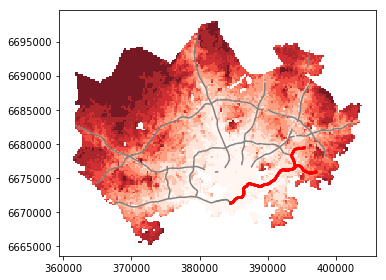

In [5]:
# Visualize the travel times into 9 classes using "Quantiles" classification scheme
# Add also a little bit of transparency with `alpha` parameter
# (ranges from 0 to 1 where 0 is fully transparent and 1 has no transparency)
my_map = grid.plot(column="car_r_t", linewidth=0.03, cmap="Reds", scheme="quantiles", k=9, alpha=0.9)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=my_map, color="grey", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=my_map, color="red", linewidth=2.5)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = "static_map.png"
plt.savefig(outfp, dpi=300)

## Adding basemap from external source

It is often useful to add a basemap to your visualization that shows e.g. streets and their names, landuse information etc. directly in your visualization. This can be done easily by using ready-made background maps from different tile providers such as OpenStreetMap, Stamen Design. A Python library called [contextily](https://github.com/darribas/contextily) is a handy package that can be used to fetch geospatial raster files and add them to your maps. 

- Let's see 